<h1> Simple linear Regression </h1>

<h2> By Famba Abdulnassiir Siraji </h2>

<h3> Reg No:  Jan22/Comp/1195u </h3>
<h3> Course Unit:  J22.CS 507 Machine Learning </h3>

<p> Question 1 <br />

Using Simple linear regression in the data set provides, state the:
    
    a)  Intercept value (4 mark)
    b) gradient value (4 mark)
    c) Simple linear regression model (4 mark)
    d) R-Squared Value (4 mark)
    e) Mean squared error (MSE) (4 marks)
    
</p>

<h2> Import the Libraries and Data to be used. </h2>

In [20]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

 # for test-train split:
from sklearn.model_selection import train_test_split

    # for linear regression:
from sklearn.linear_model import LinearRegression

    # for K-Folds cross validaton and prediction:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

    # for mean-squared-error:
from sklearn.metrics import mean_squared_error

    # for saving trained models to disk:
import pickle

In [22]:
#import the file, automobileEDA.csv
autoMobile = pd.read_csv ('./Data/automobileEDA.csv')

#print the first five record to verify data is imported as successful
autoMobile.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2> Plot the data </h2>
<b>Define the correlation between the Data </b>

In [23]:
#Define Correlation
autoMobile.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


<AxesSubplot:>

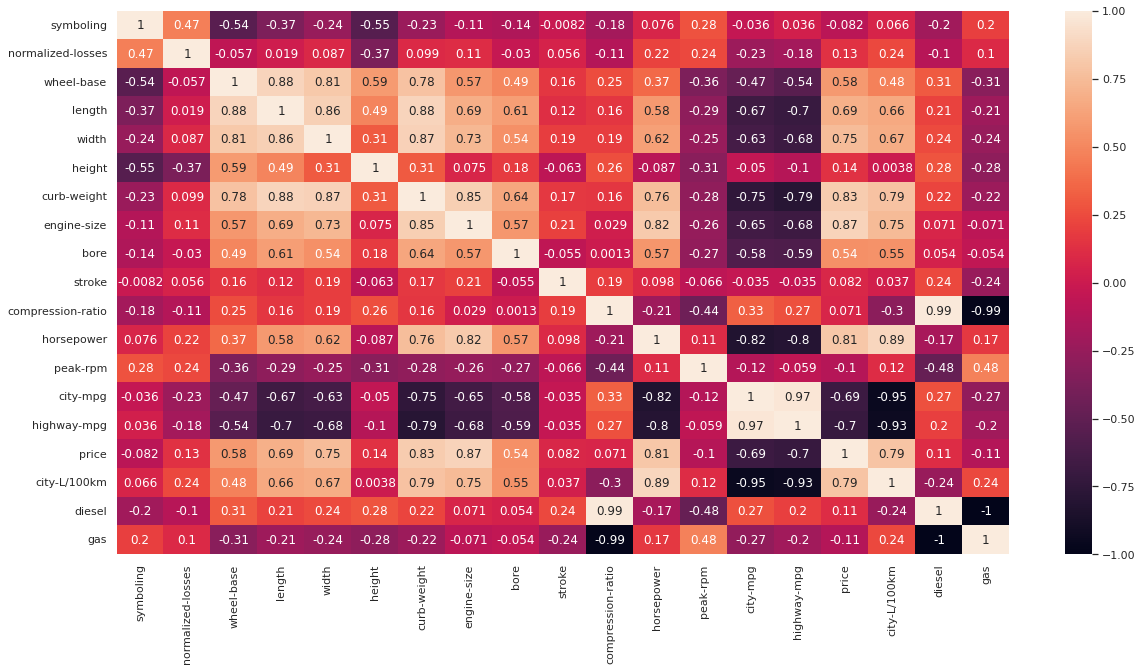

In [24]:
#
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(autoMobile.corr(), annot=True)


<p> From the correlation data. <br />

The correlation between engine-size and price is strong positive correlation seen by the coefficient of 0.872335
    
The correlation between horsepower and price is strong positive correlation seen by the coefficient of 0.809575
    
The correlation between highway-mpg and price is strong negative correlation seen by the coefficient of -0.704692

</p>

<h2> Create the Plot </h2>

<b>Plot showing correlation between Engine-size and price </b>

             engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000


<AxesSubplot:xlabel='engine-size', ylabel='price'>

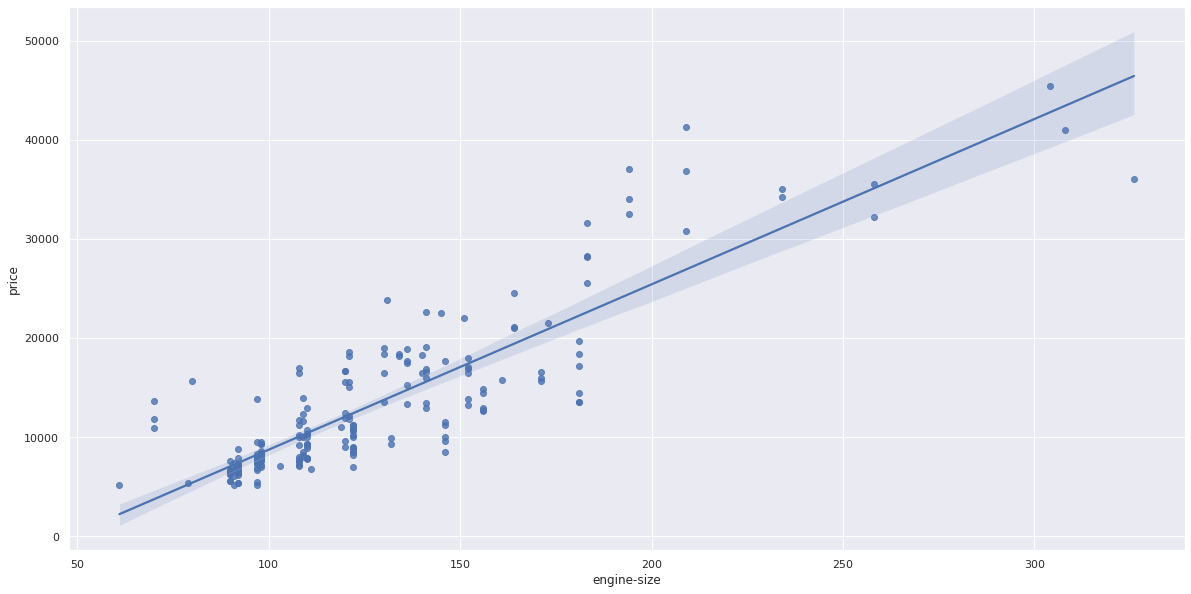

In [25]:
print(autoMobile[["engine-size", "price"]].corr())
sns.regplot(x="engine-size", y="price", data=autoMobile)

<b>Plot showing correlation between Horsepower and price </b>

            horsepower     price
horsepower    1.000000  0.809575
price         0.809575  1.000000


<AxesSubplot:xlabel='horsepower', ylabel='price'>

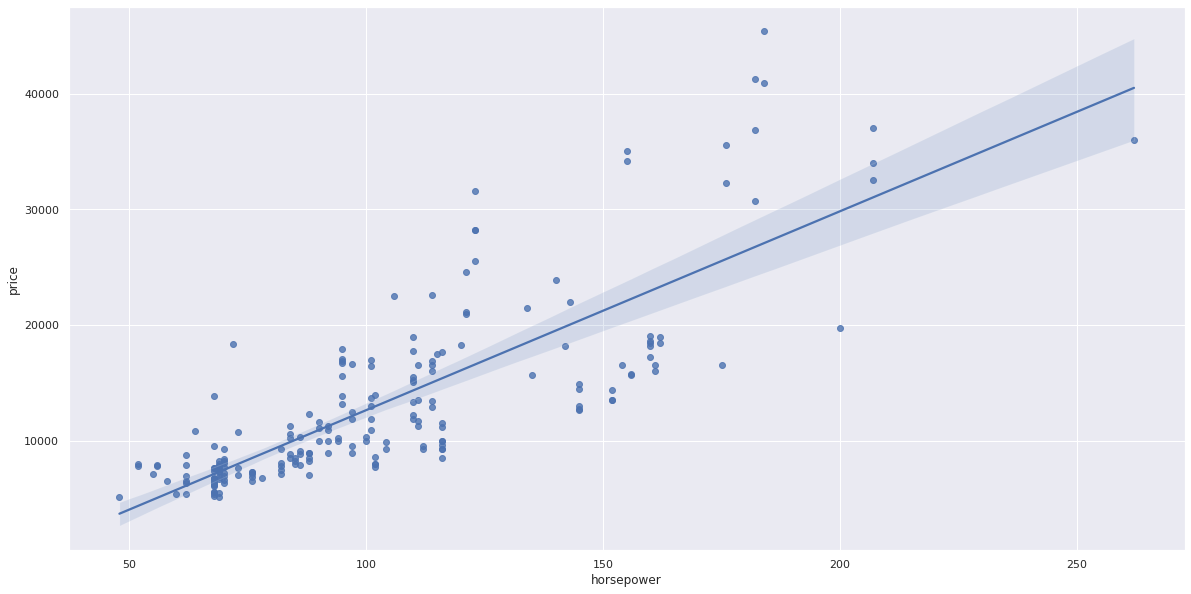

In [26]:
print(autoMobile[["horsepower", "price"]].corr())
sns.regplot(x="horsepower", y="price", data=autoMobile)

<b>Plot showing correlation between highway-mpg and price </b>

             highway-mpg     price
highway-mpg     1.000000 -0.704692
price          -0.704692  1.000000


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

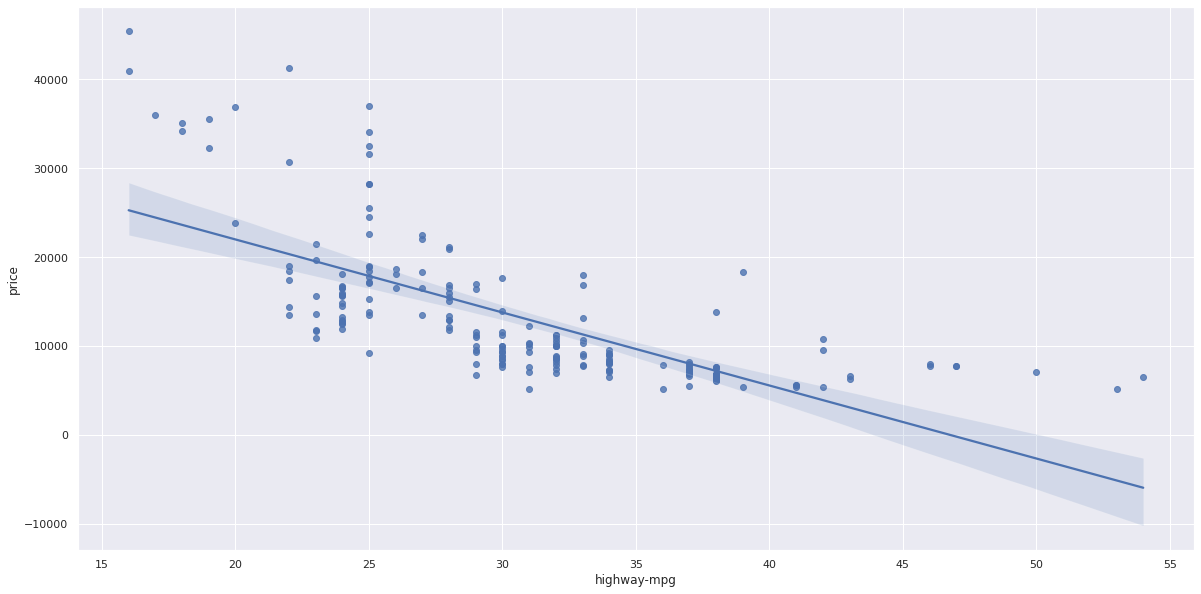

In [27]:
print(autoMobile[["highway-mpg", "price"]].corr())
sns.regplot(x="highway-mpg", y="price", data=autoMobile)

<h3> We shall focus more on the Engine-size vs price since it has the highest correlation </h3>

<h2>Perform Simple Linear Regression </h2>

<h2> Write our simple linear models </h2>

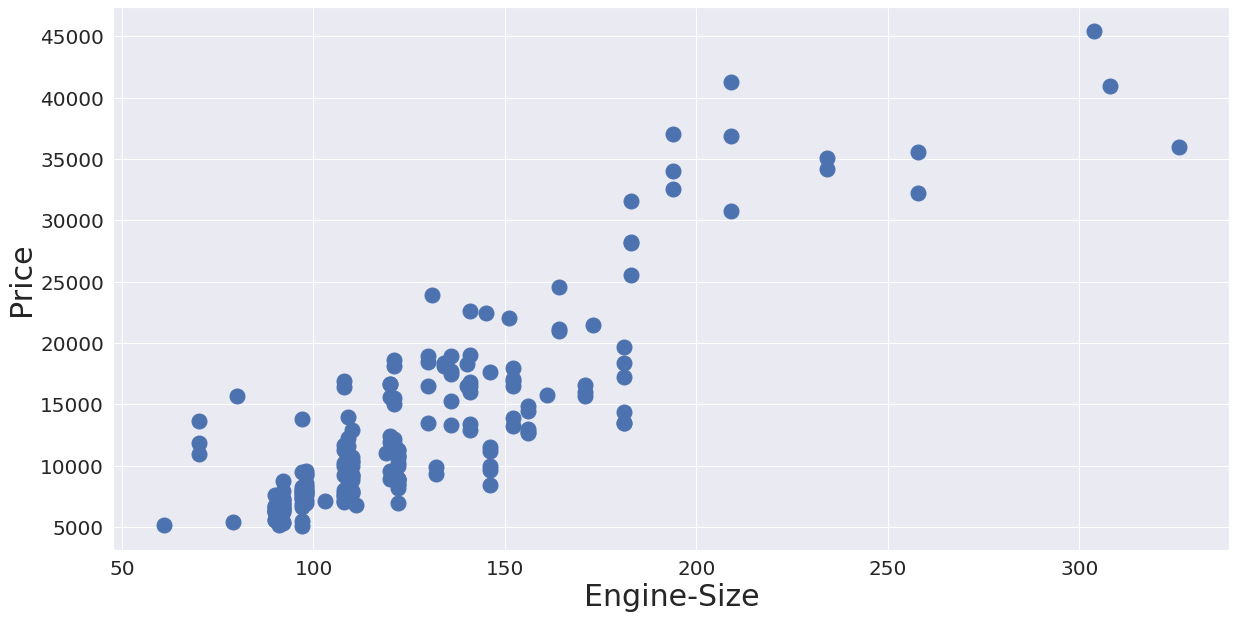

In [28]:
# dependent variable for y axis
y = autoMobile['price']

# independent variable for x axis
x = autoMobile['engine-size']


#Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(x,y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Price', fontsize = 30)
plt.xlabel('Engine-Size', fontsize = 30)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

<h2> Calculate the slop and y-intercept of the linear Regression line </h2?

In [29]:
# Use numpy polyfit for linear regression to fit the data
# Generate the slope of the line (m)
# Generate the y-intercept (b)
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b))

The slope of line is 166.86.
The y-intercept is -7963.34.
The best fit simple linear regression line is 166.86x + -7963.34.


<h2> Model</h2>

In [30]:
#Create linear regression Object
lm = LinearRegression()

x = autoMobile[['engine-size']]
y = autoMobile['price']

lm.fit(x,y)

LinearRegression()

In [31]:
Yhat=lm.predict(x)
Yhat[0:5]  

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [32]:
lm.intercept_

-7963.338906281046

In [33]:
lm.coef_

array([166.86001569])

<h2> Calculate R2 </h2>

In [34]:
#engine-size fit
x = autoMobile[['engine-size']]
y = autoMobile['price']

lm.fit(x,y)
#find the R^2
print(f'The R-squared is:{lm.score(x,y)}')


The R-squared is:0.7609686443622008


<h2>~76.0% of Vairation of the Price is expalianed by this simple linear model engine-size fit </h2>

<h3>calculate MSE </h3>

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
Yhat=lm.predict(x)
mse = mean_squared_error(autoMobile['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.025174143


<h2>Multiple Linear Regression</h2>
<p>
Using multiple linear regression in the data set provides, state the:
    
    a) Intercept value (4 mark)
    b) gradient value (4 mark)
    c) multiple linear regression model (4 mark)
    d) R-Squared Value (4 mark)
    e) Mean squared error (MSE) (4 marks)
    
</p>

<h3> From previous data we saw other predictors of price like Horsepower,Curb-weight,Engine-size and Highway-mpg</h3>

<h3> Build multiple Linear Regression model using these variables as the predictor variables </h3>

In [45]:
#creating regression variable
mlm = LinearRegression()

z = autoMobile [['horsepower','curb-weight','engine-size','highway-mpg']]

#fit the Linear Model using the four above mentioned variables.
mlm.fit(z, autoMobile['price'])
print("What is the value of the intercept (a)? \n {}".format(mlm.intercept_))
print("What are the values of the coefficients (b1, b2, b3, b4)? \n {}".format(mlm.coef_))
print("\n Final estimated linear model")
print(f"\n Price = {mlm.intercept_} + {mlm.coef_[0]}*horsepower + {mlm.coef_[1]}*curb-weight + {mlm.coef_[2]}*engine-size + {mlm.coef_[3]}*highway-mpg")

What is the value of the intercept (a)? 
 -15806.624626329205
What are the values of the coefficients (b1, b2, b3, b4)? 
 [53.49574423  4.70770099 81.53026382 36.05748882]

 Final estimated linear model

 Price = -15806.624626329205 + 53.495744226049176*horsepower + 4.70770099461393*curb-weight + 81.53026382122762*engine-size + 36.05748881648591*highway-mpg


<h2>Calculate R^2</h2>

In [46]:
#Fit the Model
lm.fit(z, autoMobile['price'])

#Find the R^2
print(f'The R^2 is: {lm.score(z, autoMobile["price"])}')

The R^2 is: 0.8093562806577457


<h3> ~80.1 % of the variation of price is explained by this multiple linear regression "multi_fit" </h3>

<h2> Calculate MSE </h2>

<b> We produce a prediction </b>

In [47]:
Y_predict_multifit = lm.predict(z)

In [48]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(autoMobile['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649
